# Counts Analysis with Disorder Associations

Co-occurence of terms analysis: check how often pre-selected cognitive terms appear in abstracts with ERP terms. 

This analysis searches through pubmed for papers that contain specified ERP and selected association terms.

Data extracted is the count of the number of papers with both terms. This is used to infer the associated terms for each ERP.

This notebook covers the disorder-related association terms.

In [1]:
%matplotlib inline

import numpy as np
from scipy.stats import normaltest

from lisc import Counts
from lisc.utils import SCDB, load_object
from lisc.plts.counts import plot_matrix, plot_clustermap, plot_dendrogram

In [2]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_count_hist, plot_time_associations
from analysis import get_time_associations

## Setup

In [3]:
# Notebook settings
SAVE_FIG = False

In [4]:
# Analysis settings
N_ERPS = 150

In [5]:
# Set the file locations
term_dir = '../terms/'
figs_dir = '../data/figures/counts'
db = SCDB('../data/')

In [6]:
# Set the name of the file to load
name = 'disease'

In [7]:
# Load the counts object
counts = load_object('counts_' + name, directory=db)

### Check Database Information

Check the metadata about the data collection, including checking the database data were collected from.

In [8]:
# Check database information
counts.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210530-1333.1',
 'count': '32606554',
 'lastupdate': '2021/05/30 18:23'}

In [9]:
# Check requester details
counts.meta_data.requester

{'n_requests': 4411,
 'wait_time': 0.1,
 'start_time': '13:10:47 Monday 31 May 2021',
 'end_time': '13:36:02 Monday 31 May 2021',
 'logging': 'file'}

## Collection Summaries

### ERP Articles

In [10]:
# Check the total number of association papers
print('The total # of ERP papers is \t\t {:.0f}'.format(sum(counts.terms['A'].counts)))

The total # of ERP papers is 		 32186


Test for normality (log-spaced) 	 t-val: 7.83 	 p-val 0.02


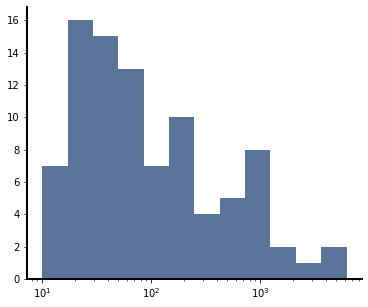

In [11]:
# Check the distribution of ERP papers
print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
      *normaltest(np.log10(counts.terms['A'].counts))))
plot_count_hist(counts.terms['A'].counts, bins=12,
                save_fig=SAVE_FIG, file_name='erp_hist.pdf', directory=figs_dir)

### Association Articles

In [12]:
# Check the total number of association papers
print('The total # of association papers is \t\t {:.0f}'.format(sum(counts.terms['B'].counts)))

The total # of association papers is 		 2236675


Test for normality (log-spaced) 	 t-val: 1.50 	 p-val 0.47


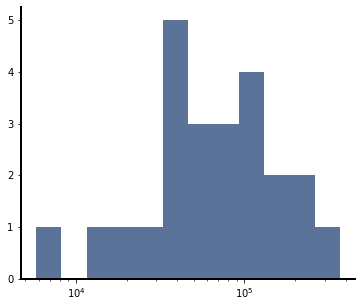

In [13]:
# Check the distribution of association papers
print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
      *normaltest(np.log10(counts.terms['B'].counts))))
plot_count_hist(counts.terms['B'].counts, bins=12,
                save_fig=SAVE_FIG, file_name=name + '_assoc_hist.pdf', directory=figs_dir)

### Co-occurence Numbers

In [14]:
# Check how many co-occurence values are zero
n_coocs = np.multiply(*counts.counts.shape)
n_zero = sum(np.ravel(counts.counts) == 0)
percent_zero = (n_zero / n_coocs) * 100

In [15]:
# Print out completeness of the co-occurence matrix
print('Percent zero: \t\t% {:4.2f}'.format(percent_zero))
print('Percent non-zero: \t% {:4.2f}'.format(100-percent_zero))

Percent zero: 		% 62.82
Percent non-zero: 	% 37.18


In [16]:
# Print out summaries of the co-occurence data
print('The total number of cooc values is: \t{:d}'.format(sum(np.ravel(counts.counts))))
print('The median number of cooc values is: \t{:2.2f}'.format(np.median(np.ravel(counts.counts))))

The total number of cooc values is: 	9266
The median number of cooc values is: 	0.00


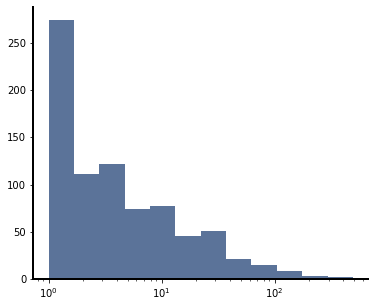

In [17]:
# Plot the distribution of (non-zero) co-occurence values
plot_count_hist(np.ravel(counts.counts), bins=12, log=True)

# Check Counts

In [18]:
# Check the terms with the most papers
counts.check_top(dim='A')
counts.check_top(dim='B')

The most studied term is  'P300'  with  6190  articles.
The most studied term is  'depression'  with  371295  articles.


In [19]:
# Check how many papers were found for each ERP term
counts.check_counts(dim='A')

The number of documents found for each search term is:
  'P100'    -   1823
  'P150'    -    203
  'P170'    -     35
  'P180'    -     84
  'P200'    -    857
  'P220'    -     46
  'P230'    -     23
  'P240'    -     31
  'P250'    -     91
  'P270'    -     17
  'P300'    -   6190
  'P3a'     -   1016
  'P3b'     -   1064
  'P340'    -     10
  'P350'    -     72
  'P400'    -    181
  'P500'    -     62
  'P550'    -     15
  'P600'    -    718
  'P900'    -     21
  'N100'    -   1038
  'N110'    -     23
  'N120'    -     56
  'N130'    -     39
  'N135'    -     46
  'N140'    -    178
  'N150'    -    118
  'N160'    -     57
  'N170'    -   1379
  'N180'    -     39
  'N190'    -     25
  'N200'    -    781
  'N2a'     -    149
  'N2b'     -    237
  'N2c'     -     35
  'N2pc'    -    506
  'N240'    -     20
  'N250'    -    270
  'N270'    -     66
  'N280'    -     23
  'N290'    -     52
  'N300'    -    196
  'N320'    -     26
  'N350'    -     83
  'N400'    -   2597


In [20]:
# Check how many papers were found for each association term
counts.check_counts(dim='B')

The number of documents found for each search term is:
  'alcoholism'                -    51152
  'addiction'                 -    74098
  'ADHD'                      -    33686
  'alzheimer'                 -   158871
  'anxiety'                   -   211528
  'autism'                    -    49426
  'bipolar'                   -    66355
  'coma'                      -    35084
  'dementia'                  -   118653
  'depression'                -   371295
  'dyslexia'                  -     5758
  'epilepsy'                  -   147927
  'intellectual disability'   -    43732
  'language impairment'       -    17594
  'migraine'                  -    97207
  'MCI'                       -    48850
  'multiple sclerosis'        -    80206
  'OCD'                       -    15773
  'parkinson'                 -   111261
  'PTSD'                      -    31945
  'psychosis'                 -    40770
  'schizophrenia'             -   118295
  'stroke'                    -   262364
  

In [21]:
# Check the most commonly associated association term for each ERP
counts.check_data()

For  'P100'   the highest association is  'multiple sclerosis'       with         134
For  'P150'   the highest association is  'anxiety'                  with           3
For  'P170'   the highest association is  'epilepsy'                 with           1
For  'P180'   the highest association is  'epilepsy'                 with           5
For  'P200'   the highest association is  'schizophrenia'            with          78
For  'P220'   the highest association is  'stroke'                   with           1
For  'P230'   the highest association is  'alcoholism'               with           0
For  'P240'   the highest association is  'dementia'                 with           1
For  'P250'   the highest association is  'ADHD'                     with           4
For  'P270'   the highest association is  'alzheimer'                with           1
For  'P300'   the highest association is  'schizophrenia'            with         477
For  'P3a'    the highest association is  'schizophren

In [22]:
# Check the most commonly associated ERP for each term
counts.check_data(dim='B')

For  'alcoholism'               the highest association is  'P300'   with         143
For  'addiction'                the highest association is  'P300'   with          60
For  'ADHD'                     the highest association is  'P300'   with         101
For  'alzheimer'                the highest association is  'P300'   with         180
For  'anxiety'                  the highest association is  'ERN'    with         156
For  'autism'                   the highest association is  'N170'   with          65
For  'bipolar'                  the highest association is  'P300'   with          68
For  'coma'                     the highest association is  'MMN'    with          55
For  'dementia'                 the highest association is  'P300'   with         207
For  'depression'               the highest association is  'P300'   with         218
For  'dyslexia'                 the highest association is  'MMN'    with          67
For  'epilepsy'                 the highest associatio

In [23]:
for label, count in zip(counts.terms['B'].labels, np.sum(counts.counts, 0)):
    print(label, '\t', count)

alcoholism 	 292
addiction 	 195
ADHD 	 438
alzheimer 	 511
anxiety 	 831
autism 	 410
bipolar 	 252
coma 	 131
dementia 	 415
depression 	 862
dyslexia 	 202
epilepsy 	 362
intellectual disability 	 39
language impairment 	 158
migraine 	 218
MCI 	 329
multiple sclerosis 	 227
OCD 	 175
parkinson 	 391
PTSD 	 123
psychosis 	 412
schizophrenia 	 1909
stroke 	 236
TBI 	 148


## Select ERPs with enough articles

In [24]:
# Check how many ERPs currently
counts.terms['A'].n_terms

90

In [25]:
# Drop ERPs without a target number of articles
counts.drop_data(N_ERPS, dim='A')
print(counts.terms['A'].n_terms)

31


## Group Level Plots

In [26]:
# Compute the normalized score (percent association)
counts.compute_score('normalize', dim='A')

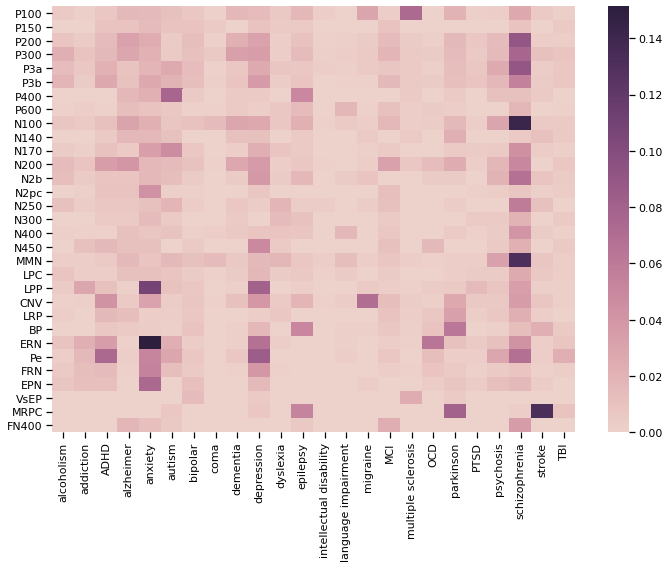

In [27]:
# Plot the matrix of percent associations - ERPs & terms
plot_matrix(counts, figsize=(10, 8), 
            save_fig=SAVE_FIG, file_name=name+'_associations.pdf', directory=figs_dir)

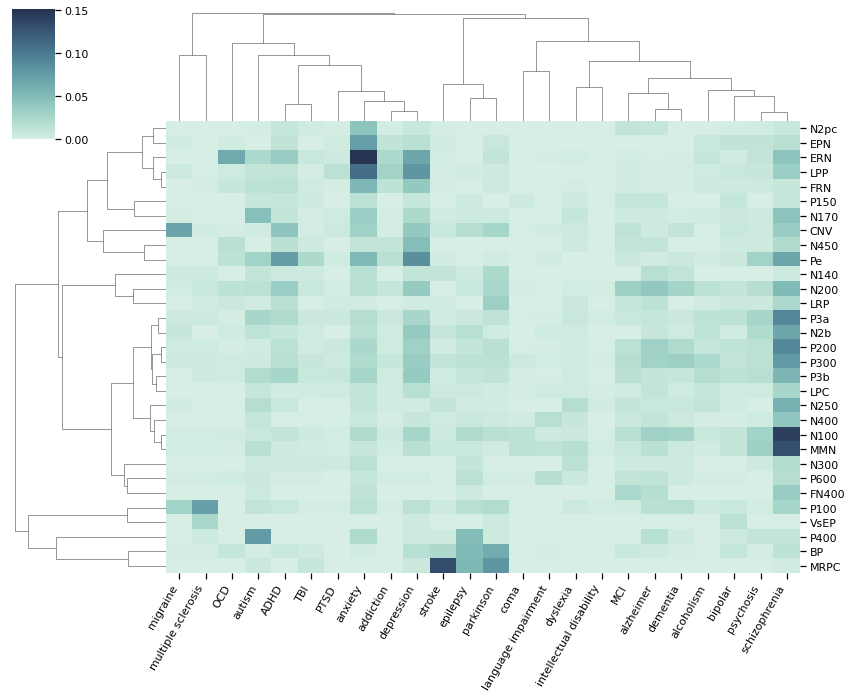

In [28]:
# Plot a clustermap, clustering ERPs and terms based on similarity
plot_clustermap(counts, attribute='score', cmap='blue', figsize=(12, 10),
                save_fig=SAVE_FIG, file_name=name+'_similarity_cluster.pdf', directory=figs_dir)

### Similarity Measure

In [29]:
# Calculate similarity between all ERPs (based on term association percents)
counts.compute_score('similarity')

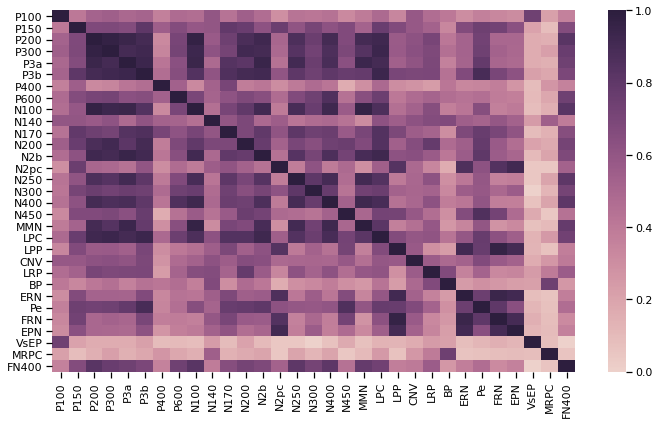

In [30]:
# Plot similarity matrix between ERPs
plot_matrix(counts, figsize=(10, 6),
            save_fig=SAVE_FIG, file_name=name+'_similarity.pdf', directory=figs_dir)

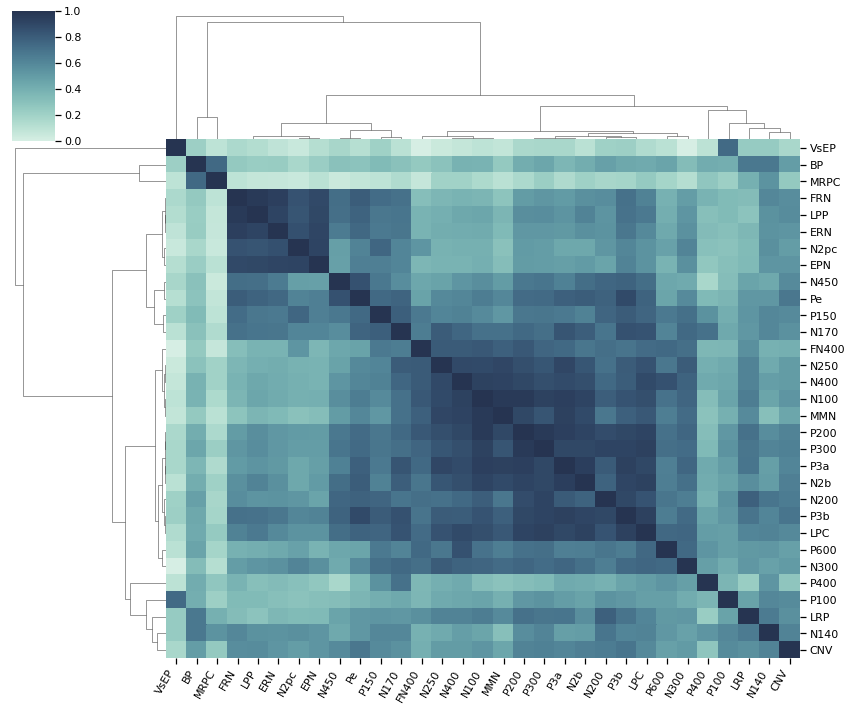

In [31]:
# Plot a clustermap, clustering ERPs and terms based on similarity
plot_clustermap(counts, cmap='blue', figsize=(12, 10),
                save_fig=SAVE_FIG, file_name=name+'_similarity_cluster.pdf', directory=figs_dir)

### Association Score

In [32]:
# Calculate association between all ERPs
counts.compute_score('association')

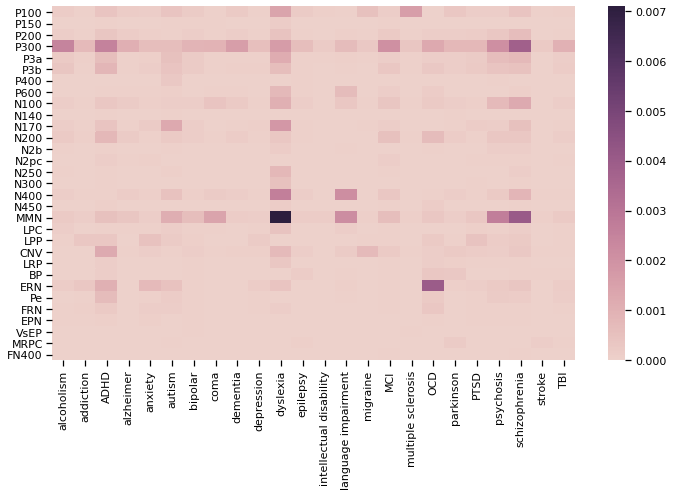

In [33]:
# Plot similarity matrix between terms
plot_matrix(counts, figsize=(10, 7),
            save_fig=SAVE_FIG, file_name=name+'_associations.pdf', directory=figs_dir)

### Dendrograms

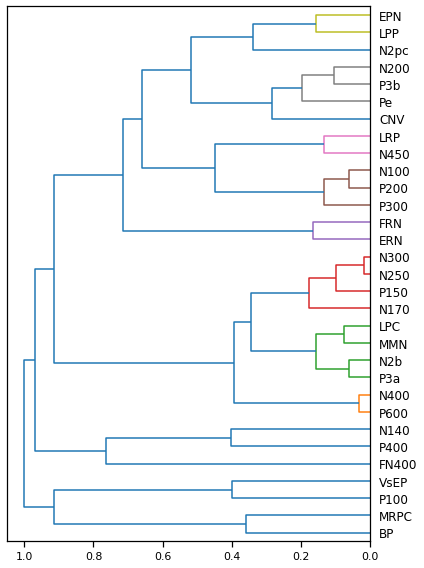

In [34]:
# Plot dendrogram of ERPs, based on percent associations with terms
plot_dendrogram(counts, attribute='score', figsize=(6, 8),
                save_fig=SAVE_FIG, file_name=name+'_erp_dendro.pdf', directory=figs_dir)

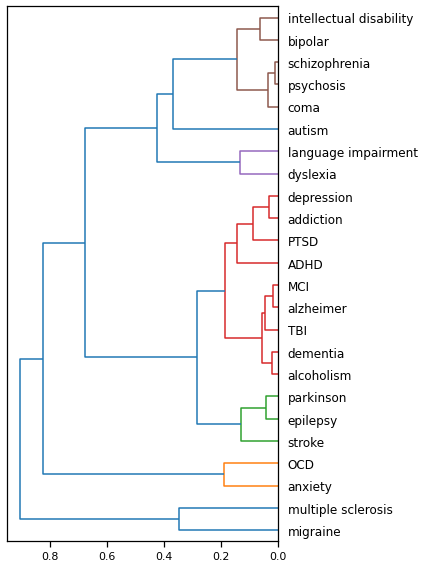

In [35]:
# Plot dendrogram of termss, based on percent associations with ERPs
plot_dendrogram(counts, attribute='score', transpose=True, figsize=(6, 8),
                save_fig=SAVE_FIG, file_name=name+'term_dendro.pdf', directory=figs_dir)

### Function correlates across time

In [36]:
# Re-compute normalized score
counts.compute_score('normalize')

In [37]:
# Get the time and polarity information for the ERPs
time_associations = get_time_associations(counts)

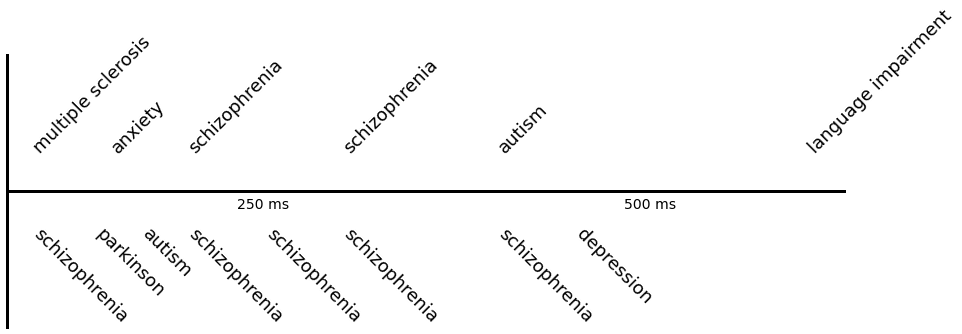

In [38]:
# Plot time associations
plot_time_associations(time_associations,
                       save_fig=SAVE_FIG, file_name=name+'time.pdf', directory=figs_dir)